In [20]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['output'] = diabetes.target

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,output
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.shape

(442, 11)

In [5]:
X = df.iloc[:, 0:9]
y = df.iloc[:, -1]

In [6]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [22]:
DTR = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=2)

In [23]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2)

In [24]:
y_pred = DTR.predict(X_test)

In [25]:
r2_score(y_test, y_pred)

0.38227130725469716

In [26]:
#HYPERPARAMETER TUNING

In [27]:
param_grid = {
    'max_depth' : [2, 4, 8, 10, None],
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_features' : [0.25, 0.5, 1],
    'min_samples_split' : [0.25, 0.5, 1]
}


In [28]:
reg = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid)

In [29]:
reg.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Us

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1],
                         'min_samples_split': [0.25, 0.5, 1]})

In [30]:
reg.best_score_

np.float64(0.3299816538676639)

In [31]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 0.5,
 'min_samples_split': 0.25}

In [32]:
#FEATURE IMPORTANCE

In [33]:
for importance, name in sorted(zip(DTR.feature_importances_, X_train.columns), reverse = True):
    print(name, importance)

s5 0.6469589066182291
bmi 0.23861460441874982
bp 0.11442648896302102
sex 0.0
s4 0.0
s3 0.0
s2 0.0
s1 0.0
age 0.0


[Text(0.5, 0.8333333333333334, 'x[8] <= 0.017\nfriedman_mse = 5851.041\nsamples = 353\nvalue = 152.453'),
 Text(0.25, 0.5, 'x[2] <= 0.006\nfriedman_mse = 4065.342\nsamples = 229\nvalue = 122.502'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 2394.65\nsamples = 167\nvalue = 103.802'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 5086.532\nsamples = 62\nvalue = 172.871'),
 Text(0.75, 0.5, 'x[3] <= 0.061\nfriedman_mse = 4432.631\nsamples = 124\nvalue = 207.766'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 4124.503\nsamples = 102\nvalue = 194.353'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 1159.68\nsamples = 22\nvalue = 269.955')]

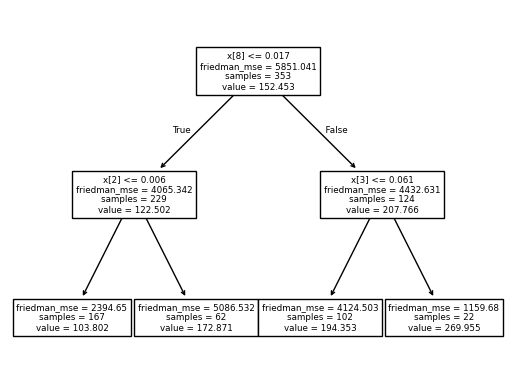

In [34]:
plot_tree(DTR)